In [15]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

pd.set_option('display.max_rows', 10)
import spacy
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [16]:
df_raw = pd.read_csv("../data/petfinder-adoption-prediction/train/train.csv")
df_raw.columns = df_raw.columns.str.lower() #make column names lowercase

In [17]:
df_description = df_raw.query('adoptionspeed == 0 or adoptionspeed == 1 ').description

In [18]:
df_description.head()

1     I just found it alone yesterday near my apartm...
6     anyone within the area of ipoh or taiping who ...
8     healthy and active, feisty kitten found in nei...
10    For serious adopter, please do sms or call for...
11    Kali is a super playful kitten who is on the g...
Name: description, dtype: object

In [19]:
#create list from the description column
text = df_description.tolist() 

# to lower case
text = str(text)
#already lower case


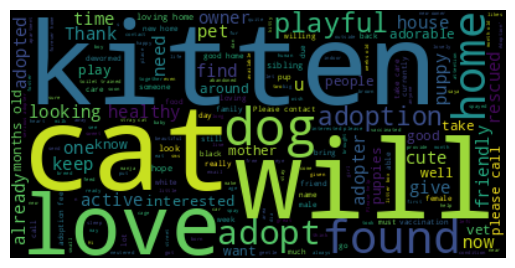

In [20]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [21]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('cat', 1061), ('kitten', 995), ('will', 927), ('love', 892), ('dog', 880)]
[('cat', 1.0), ('kitten', 0.937794533459001), ('will', 0.8737040527803959), ('love', 0.8407163053722903), ('dog', 0.8294062205466541)]


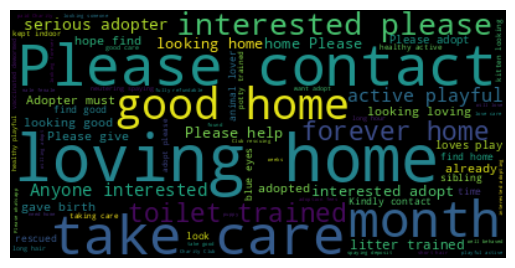

In [22]:
#create more stopwords list
stop_words = ["cats", "kittens", "week", "dogs", "call"] + list(STOPWORDS)

#create the wordcloud object
wordcloud = WordCloud(stopwords = stop_words,
                      collocations=True, min_word_length = 4, collocation_threshold=3).generate(text)


#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

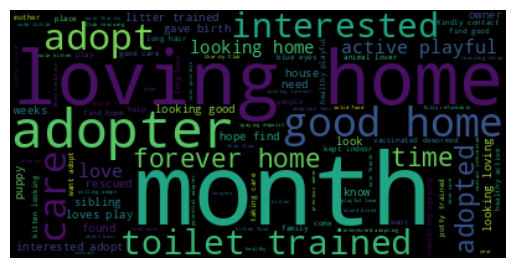

In [23]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
sw_spacy = list(sw_spacy)
stop_words_2 = sw_spacy + list(STOPWORDS) + ["cats", "kittens", "week", "dogs", "call"]
#create the wordcloud object
wordcloud = WordCloud(stopwords = stop_words_2,
                      collocations=True, min_word_length = 4, collocation_threshold=3).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()


In [24]:
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")

matcher = Matcher(nlp.vocab)

patterns = [
    [{'POS':'ADJ'}, {'POS':'NOUN'}],
    ]
matcher.add("demo", patterns)

doc = nlp(text[1:1000000])
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

2193290520773312886 demo 23 25 temporary care
2193290520773312886 demo 102 104 better owner
2193290520773312886 demo 107 109 better attention
2193290520773312886 demo 119 121 feisty kitten
2193290520773312886 demo 136 138 serious adopter
2193290520773312886 demo 145 147 more details
2193290520773312886 demo 157 159 playful kitten
2193290520773312886 demo 235 237 normal routine
2193290520773312886 demo 248 250 single cat
2193290520773312886 demo 259 261 second vaccination
2193290520773312886 demo 267 269 next month
2193290520773312886 demo 270 272 Serious adopters
2193290520773312886 demo 285 287 more info
2193290520773312886 demo 301 303 first posting
2193290520773312886 demo 315 317 stray cat
2193290520773312886 demo 350 352 cute kittens
2193290520773312886 demo 385 387 long hair
2193290520773312886 demo 393 395 stray batch
2193290520773312886 demo 401 403 caring homes
2193290520773312886 demo 439 441 indoor cat
2193290520773312886 demo 446 448 good hands
2193290520773312886 demo 458 

#### For no adoption

In [25]:
df_description_low = df_raw.query('adoptionspeed == 4 ').description

In [26]:
df_description_low.value_counts()

description
Please feel free to contact us : Stuart                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [27]:
#create list from the description column
text_low = df_description_low.tolist() 

# to lower case
text_low = str(text_low)
#already lower case


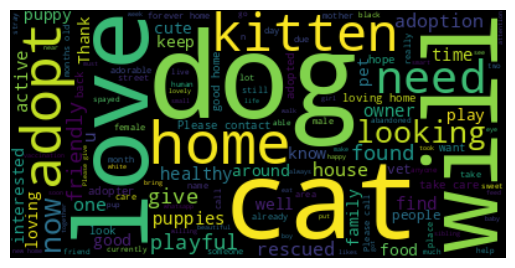

In [28]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text_low)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [29]:
# create a dictionary of word frequencies
text_dictionary_low = wordcloud.process_text(text_low)
# sort the dictionary
word_freq_low={k: v for k, v in sorted(text_dictionary_low.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq_low = wordcloud.words_

#print results
print(list(word_freq_low.items())[:5])
print(list(rel_freq_low.items())[:5])

[('dog', 1445), ('cat', 1204), ('will', 1019), ('love', 1010), ('home', 912)]
[('dog', 1.0), ('cat', 0.8332179930795848), ('will', 0.7051903114186852), ('love', 0.698961937716263), ('home', 0.6311418685121107)]


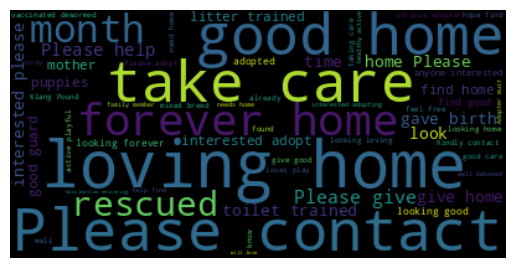

In [30]:
#create more stopwords list
stop_words = ["cats", "kittens", "week", "dogs", "call"] + list(STOPWORDS)

#create the wordcloud object
wordcloud_2 = WordCloud(stopwords = stop_words,
                      collocations=True, min_word_length = 4, collocation_threshold=3).generate(text_low)

#plot the wordcloud object
plt.imshow(wordcloud_2, interpolation='bilInear')
plt.axis('off')
plt.show()

In [33]:
nlp_2 = spacy.load("en_core_web_sm")

matcher_2 = Matcher(nlp.vocab)

patterns = [
    [{'POS':'ADJ'}, {'POS':'NOUN'}],
    ]
matcher.add("demo", patterns)

doc = nlp(text_low[1:1000000])
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

2193290520773312886 demo 5 7 stray cat
2193290520773312886 demo 34 36 high pitch
2193290520773312886 demo 37 39 soft meow
2193290520773312886 demo 68 70 friendly strays
2193290520773312886 demo 114 116 great goalie
2193290520773312886 demo 118 120 loyal guardog
2193290520773312886 demo 177 179 male dog
2193290520773312886 demo 212 214 plss call
2193290520773312886 demo 252 254 ekor hitam
2193290520773312886 demo 283 285 lightest kitty
2193290520773312886 demo 310 312 big spot
2193290520773312886 demo 318 320 cute spot
2193290520773312886 demo 341 343 sweet voice
2193290520773312886 demo 405 407 friendly doggie
2193290520773312886 demo 441 443 former owner
2193290520773312886 demo 531 533 new family
2193290520773312886 demo 618 620 adorable male
2193290520773312886 demo 645 647 responsible adopters
2193290520773312886 demo 655 657 special rescue
2193290520773312886 demo 721 723 obedient dog
2193290520773312886 demo 731 733 previous owner
2193290520773312886 demo 740 742 medical examinat